In [1]:
from pydmd import DMD
from pydmd.plotter import plot_summary
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import inspect
from sklearn.cluster import k_means

plt.rcParams['text.usetex'] = True

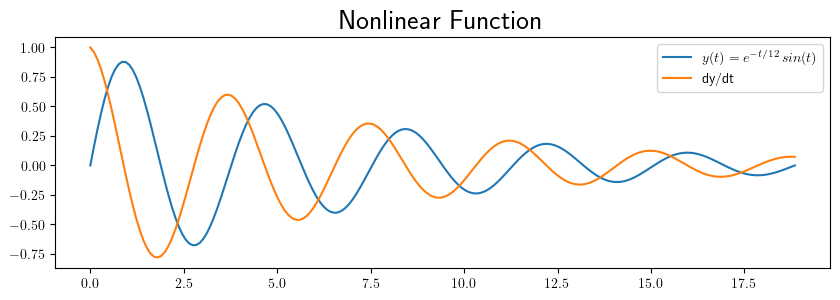

In [117]:
t = np.linspace(0,10*np.pi,200)
y = np.sin(t) * np.exp(-t/12)
dy = np.exp(-t/12) * np.cos(t) - (1/12) * np.exp(-t/12) * np.sin(t)
plt.figure(figsize=(10,3))
plt.plot(t,y,label='$y(t) = e^{-t/12} \, sin(t)$')
plt.plot(t,dy,label='dy/dt')
plt.title('Nonlinear Function',fontsize=20)
plt.legend()
plt.show()

In [108]:
data = np.vstack((y,dy))
data.shape

(2, 200)

In [109]:
dmd = DMD(svd_rank=2) # Exact DMD with 12 spatiotemporal modes
dmd.fit(data); # data = (dimensions, time steps)
# plot_summary(dmd)

modes = dmd.modes                  # shape: (features, rank)
eigvals = dmd.eigs                 # shape: (rank,)
dt = t[1] - t[0]                   # time step
omega = np.log(eigvals) / dt      # continuous-time eigenvalues
time_points = t                   # same as original time

x0 = data[:,0]
b = np.linalg.lstsq(modes, x0, rcond=None)[0]

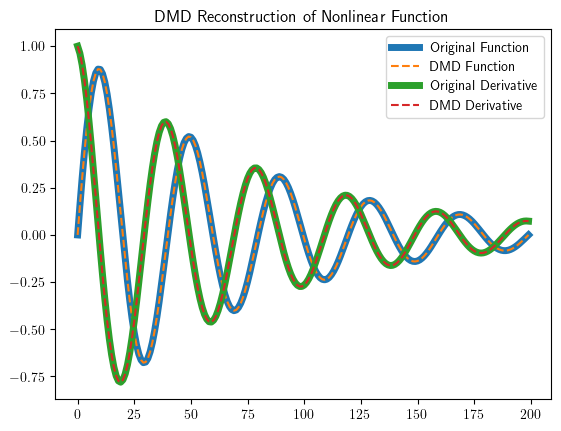

In [114]:
X_dmd = np.zeros((modes.shape[0], len(time_points)), dtype=complex)
for i, t_i in enumerate(time_points):
    time_dynamics = b * np.exp(omega * t_i)
    X_dmd[:, i] = modes @ time_dynamics

# Plot comparison (real part only)
plt.plot(data[0,:], linewidth=5,label='Original Function')
plt.plot(X_dmd.real[0,:], '--', label='DMD Function')
plt.plot(data[1,:], linewidth=5, label='Original Derivative')
plt.plot(X_dmd.real[1,:], '--', label='DMD Derivative')
plt.legend()
plt.title("DMD Reconstruction of Nonlinear Function")
plt.show()


In [ ]:
# X_reconstructed(t) = Modes * (Initial Conditions * exp(eigenvalues * t))

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("minhnguyen181121351/flight-trajectory-dataset")

# print("Path to dataset files:", path)

In [4]:
def get_lambda_source(lambda_func):
    # Retrieves the source code of a lambda function.
    # Returns: The source code of the lambda function as a string, or None if it cannot be retrieved.

    try:
        source_lines = inspect.getsource(lambda_func)
        return source_lines.strip()
    except OSError:
        return None

In [5]:
def create_time_series(domain,f1,f2,f3,plot=False):

    x1 = f1(domain)
    x2 = f2(domain)
    x3 = f3(domain)
    
    X = np.vstack([domain,x1,x2,x3]).T

    if plot:
        data = go.Scatter3d(x=X[:,1],y=X[:,2],z=X[:,3],
                    mode='lines')

        layout = go.Layout(width=600,
                           height=600,
                           scene=dict(aspectmode='manual',
                                      aspectratio=dict(x=1, y=1, z=1)))
        
        fig = go.Figure(data=data,layout=layout)
        fig.show()

    return X

In [6]:

# Random number generator (optional seed)
rng = np.random.default_rng()

# Randomized function definitions
f1  = lambda x: x/5 * rng.uniform(0.8, 1.2)
f2  = lambda x: x**0.4 * rng.uniform(0.8, 1.2)
f3  = lambda x: np.sqrt(x + rng.uniform(0, 1))
f4  = lambda x: np.log(x + 1 + rng.uniform(0, 2))
f5  = lambda x: np.exp(-rng.uniform(0.005, 0.02) * x)
f6  = lambda x: np.exp(-((x - rng.uniform(40, 60))/rng.uniform(8, 15))**2)
f7  = lambda x: np.sin(rng.uniform(0.05, 0.15) * x)
f8  = lambda x: np.cos(rng.uniform(0.05, 0.15) * x)
f9  = lambda x: np.sin(rng.uniform(0.08, 0.12) * x) * np.exp(-rng.uniform(0.005, 0.02) * x)
f10 = lambda x: x * np.exp(-rng.uniform(0.03, 0.07) * x)

f11 = lambda x: np.log(x + 1 + rng.uniform(0, 1)) * np.sin(rng.uniform(0.15, 0.25) * x)
f12 = lambda x: np.tanh((x - rng.uniform(45, 55)) / rng.uniform(8, 15))
f13 = lambda x: np.sin(x / rng.uniform(4, 6))**2
f14 = lambda x: 1 / (1 + x + rng.uniform(0, 1))
f15 = lambda x: np.exp(-np.sqrt(x + rng.uniform(0, 2)))
f16 = lambda x: np.sin(x / rng.uniform(2, 5)) + rng.uniform(0.005, 0.02) * x
f17 = lambda x: np.cos(x / rng.uniform(3, 5)) * np.exp(-rng.uniform(0.005, 0.02) * x)
f18 = lambda x: np.sin(rng.uniform(0.15, 0.25) * x) * np.sin(rng.uniform(0.03, 0.07) * x)
f19 = lambda x: (
    np.exp(-((x - rng.uniform(25, 35)) / rng.uniform(4, 6))**2) +
    np.exp(-((x - rng.uniform(65, 75)) / rng.uniform(4, 6))**2)
)
f20 = lambda x: np.sinh(rng.uniform(0.008, 0.015) * x)

random_functions = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10,
             f11, f12, f13, f14, f15, f16, f17, f18, f19, f20]

random_functions = {f'f{i}' : f for i,f in enumerate(random_functions)}

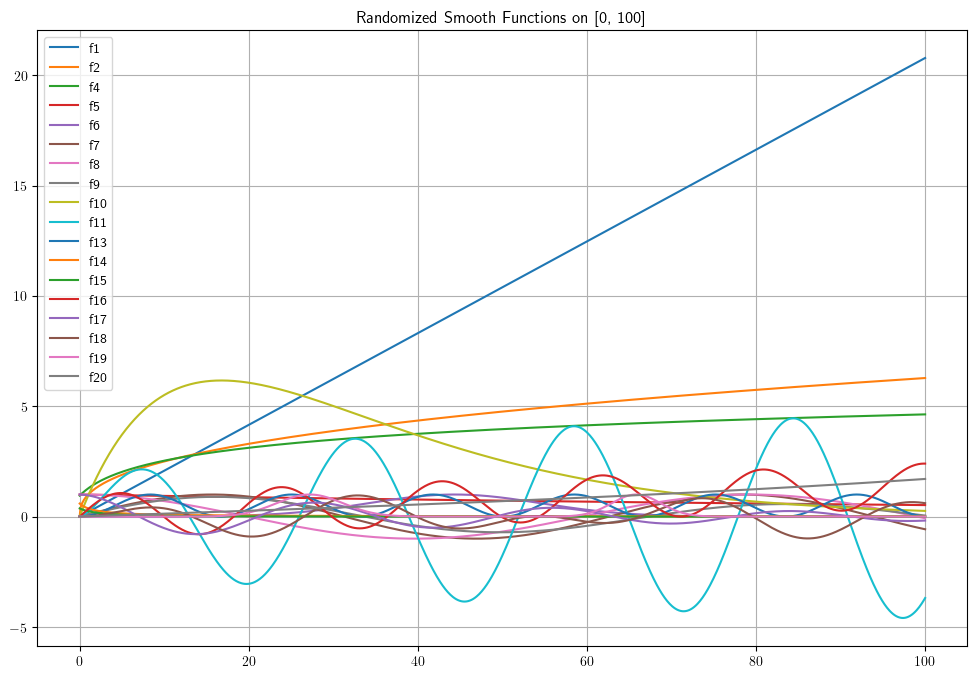

In [7]:
x = np.linspace(0, 100, 1000)

plt.figure(figsize=(12, 8))
for i, f in enumerate(random_functions.keys(), start=1):
    if f in ['f2','f11']:
        continue
    y = random_functions[f](x)
    plt.plot(x, y, label=f"f{i}")
plt.legend()
plt.title("Randomized Smooth Functions on [0, 100]")
plt.grid(True)
plt.show()


In [19]:
num_cats = 3
num_samples = 20

cats = [f'c{i}' for i in range(num_cats)]
domain = np.linspace(0,100,1000)

data = {cat : [] for cat in cats}
models = {cat : [] for cat in cats}
funcs = {cat : None for cat in cats}
for cat in cats:

    fs = np.random.choice(list(random_functions.keys()),size=3,replace=True)
    
    funcs[cat] = [get_lambda_source(random_functions[f]) for f in fs]
    
    for i in range(num_samples):
    
        X = create_time_series(domain,
                               random_functions[fs[0]],
                               random_functions[fs[1]],
                               random_functions[fs[2]],
                               plot=False)

        dmd = DMD(svd_rank=12) # Exact DMD with 12 spatiotemporal modes
        dmd.fit(X); # X = (n, m)
        data[cat].append(X)
        models[cat].append(dmd)
        # plot_summary(dmd)
    

In [20]:
real_eigs = []
imag_eigs = []
for cat in cats:
    for mod in models[cat]:
        np.abs(mod.eigs)
        real_eigs.append(mod.eigs.real)
        imag_eigs.append(mod.eigs.imag)

real_eigs = np.array(real_eigs)
imag_eigs = np.array(imag_eigs)

df_eigs = pd.DataFrame(data=np.hstack([real_eigs,imag_eigs]),columns=[f'real_{i}' for i in range(num_cats)] + [f'imag_{i}' for i in range(num_cats)])
# df_eigs['m0'] = np.sqrt(df_eigs['real_0']**2 + df_eigs['imag_0']**2)
# df_eigs['m1'] = np.sqrt(df_eigs['real_1']**2 + df_eigs['imag_1']**2)
# df_eigs['m2'] = np.sqrt(df_eigs['real_2']**2 + df_eigs['imag_2']**2)
# df_eigs.to_csv('eigenvalues.csv')

In [21]:
centroid, label, inertia = k_means(df_eigs,3)

C:\Users\peterdb1\Anaconda3\envs\py310_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2])

In [23]:
df_eigs

,real_0,real_1,real_2,imag_0,imag_1,imag_2
0,0.033548,0.735209,0.735209,0.000000,0.589855,-0.589855
1,0.033808,0.791509,0.791509,0.000000,0.608395,-0.608395
2,0.037845,0.883935,0.883935,0.000000,0.599591,-0.599591
3,0.039527,0.931172,0.931172,0.000000,0.620932,-0.620932
4,0.036568,0.875310,0.875310,0.000000,0.640162,-0.640162
5,0.038292,0.818628,0.818628,0.000000,0.653009,-0.653009
6,0.038017,0.795762,0.795762,0.000000,0.626495,-0.626495
7,0.039318,1.008629,1.008629,0.000000,0.602950,-0.602950
8,0.037468,0.760590,0.760590,0.000000,0.641217,-0.641217
9,0.037823,0.958666,0.958666,0.000000,0.599550,-0.599550
